# Exploratory Data Analysis for Microsoft 

###  About: The notebook contains the analysis of IMDBs Top 1000 movies . The goal of this analysis is to offer meaningful insights to a new movie production company by answering the following questions. 

1. What kind of Budget should be expected.
2. What genre of Movies will yield the best return. 
3. What runtime yields the best return.
4. Which Director would be ideal. 

In [122]:
"""Getting all relevent imports into the file"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm

In [136]:
"""Our clean Data frame that contains information From IMDBs website and learn-co project repo"""
fulldf=pd.read_csv('fulldf.csv')

In [182]:

fulldf.info() # Display the Data to make sure its as desired.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 11 columns):
Title                             474 non-null object
Movie Rating                      474 non-null object
Year                              474 non-null int64
Director                          474 non-null object
Gross Income in millions (USD)    474 non-null float64
Movie Genre                       474 non-null object
Movie Runtime                     474 non-null int64
IMDb Rating                       474 non-null float64
Votes                             474 non-null float64
Budget in millions (USD)          474 non-null float64
Profit percent                    474 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 40.9+ KB


### 1. What kind of budget should be expected ?

In [98]:
"""Funtion to plot bargraphs using the (Dataframe, xvalues,yvalues,string title"""
# We will plot bar graphs more than twice so makes sense to have a funtion do this
def bargraph (Dataframe,xColumn,yColumn,str,):
    plt.figure(figsize=(15,10))
    sns.barplot(y=yColumn,x=xColumn)
    plt.title(str,weight='bold').set_fontsize('18')
    

In [99]:
"""Funtion to graph boxplot using the (Data,string title)"""
# We will make  boxplot graphs than twice so makes sense to have a funtion do this
def boxplot (Data,str,):
    plt.figure(figsize=(10,5))
    sns.boxplot(Data)
    plt.title(str,weight='bold').set_fontsize('18')
    plt.show()
    return Data.describe()

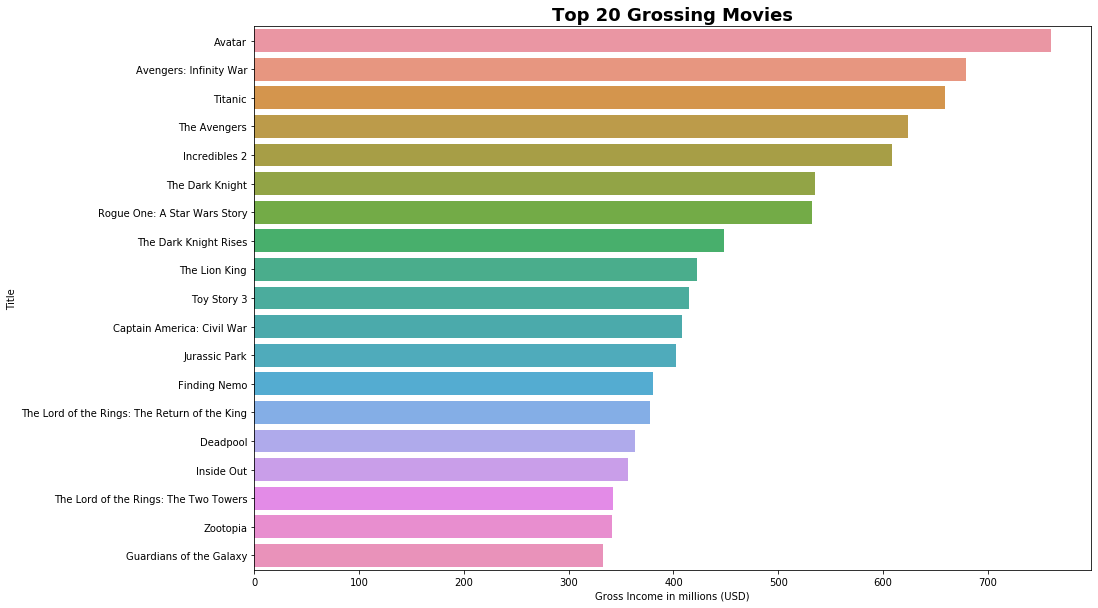

In [100]:
"""Look at the Budget of the Top 20 Grossing movies  """
# Create new df with sorted gross income values and limit to top 20
group_df = fulldf.sort_values('Gross Income in millions (USD)',ascending=False).reset_index().head(20)
# Pass this Data through the bargraph funtion so we can plot a Bar graphh
bargraph(group_df,group_df['Gross Income in millions (USD)'],group_df['Title'],"Top 20 Grossing Movies")



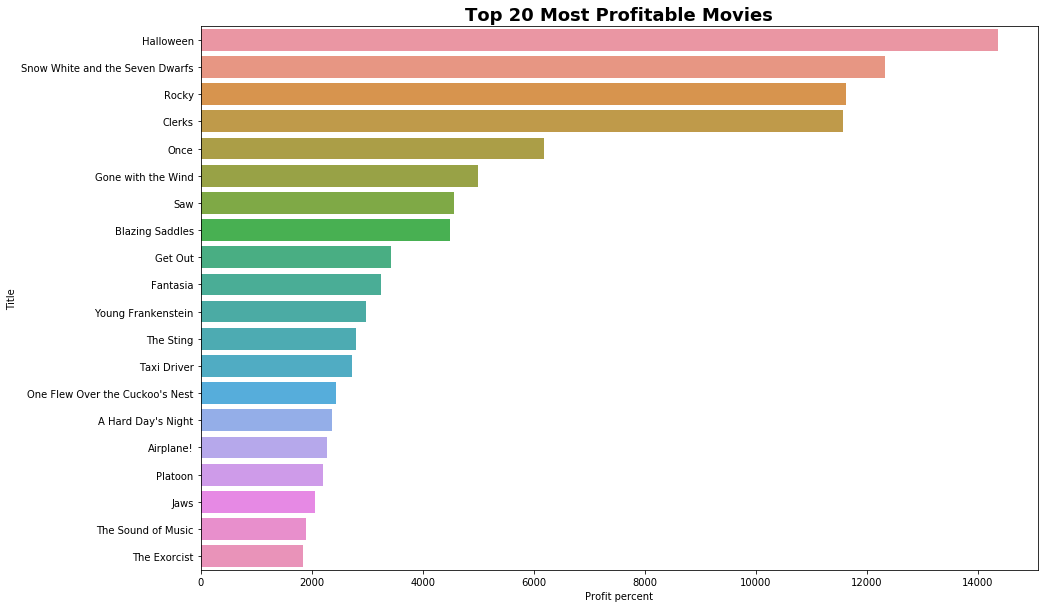

In [6]:
"""Look at the Proft Percent Return of the Top 20 Grossing movies  """
group_df = fulldf.sort_values('Profit percent',ascending=False).reset_index().head(20)
bargraph(group_df,group_df['Profit percent'],group_df['Title'],"Top 20 Most Profitable Movies")


#### We can see that none of the top Grossing movies are among the most profitable ,So does a big budget movie necessarily give a better return in terms of an investment? Down below we examine IMDb Top 1000 to answer this question.

In [188]:
"""Create a new data frame so we can populate it without outliers """
#New dataframe with only the Money figures to answer the buget question
testdf = fulldf[['Profit percent','Gross Income in millions (USD)','Budget in millions (USD)','Movie Runtime']] 


In [240]:
#testdf.info() # Check to make sure the dataframe is as desired.

In [189]:
"""Keep data values within  3 Standard deviation of each column to remove outliers, """
# Calculate the z scores of all entries , only keep data that is within 3 std
testdf=testdf[(np.abs(stats.zscore(testdf)) < 3).all(axis=1)]

In [242]:
#testdf.info() # Check to make sure the dataframe .

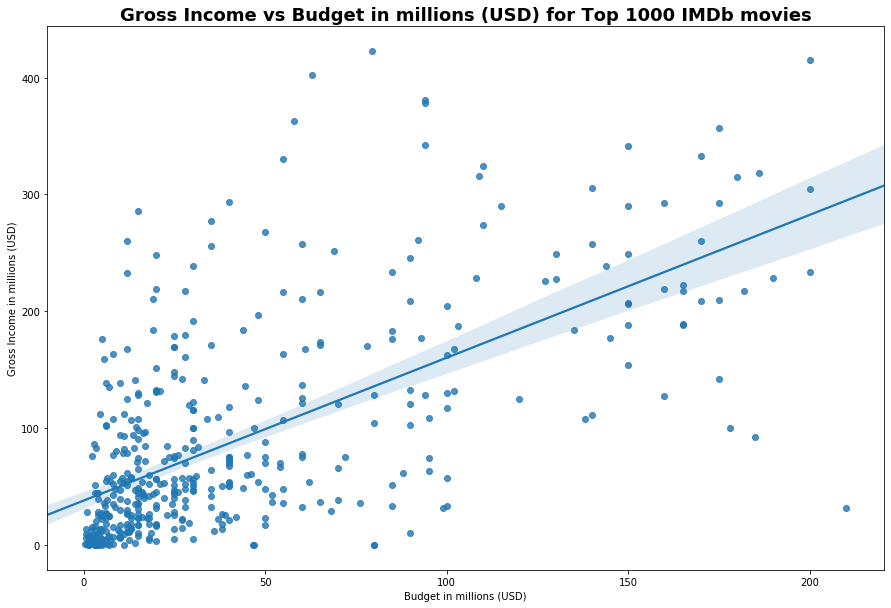

In [103]:
"""Visualtize to see what happens to Budget as Gross Income increases"""
plt.figure(figsize=(15,10))
sns.regplot(x=testdf['Budget in millions (USD)'], y=testdf['Gross Income in millions (USD)'],data=testdf)
plt.title('Gross Income vs Budget in millions (USD) for Top 1000 IMDb movies',weight='bold').set_fontsize('18')

#### As Budget increases Gross income also increases

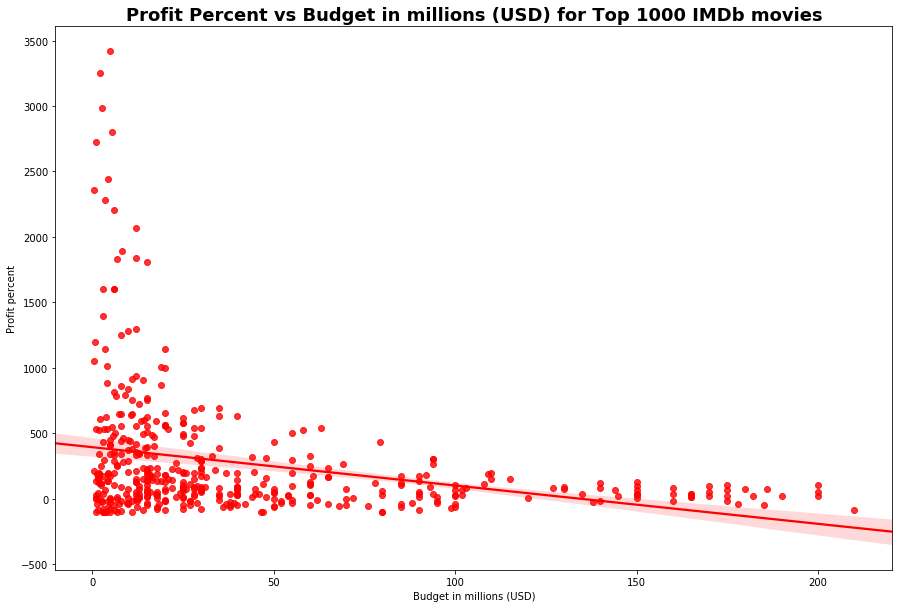

In [104]:
"""Visualtize to see what happens to Profit Percent as Gross Income increases"""
plt.figure(figsize=(15,10))
sns.regplot(x=testdf['Budget in millions (USD)'], y=testdf['Profit percent'],data=testdf,color='red')
plt.title('Profit Percent vs Budget in millions (USD) for Top 1000 IMDb movies',weight='bold').set_fontsize('18')

#### But as Budget increases percent profit actually decreases.

"""Calculate best fit line equation """
y = testdf['Profit percent'] 
x1 = testdf['Budget in millions (USD)']
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

####  Although investing a larger amount could lead to a large return it also involves a lot more risk and a relatively smaller percent profit ! We would recommend a smaller budget to start, as examined below. 

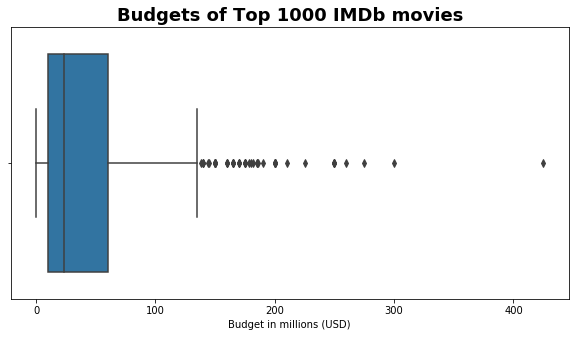

count    474.000000
mean      46.484499
std       58.688403
min        0.027000
25%       10.000000
50%       23.300000
75%       60.000000
max      425.000000
Name: Budget in millions (USD), dtype: float64

In [497]:
"""Look at the overall central tendency of Budget in millions(USD)"""
boxplot(fulldf['Budget in millions (USD)'],'Budgets of Top 1000 IMDb movies')

#### Since the Movie Budget has a lot of outliers it would be better to use the median of about 24 million as a measure of its central tendecy.

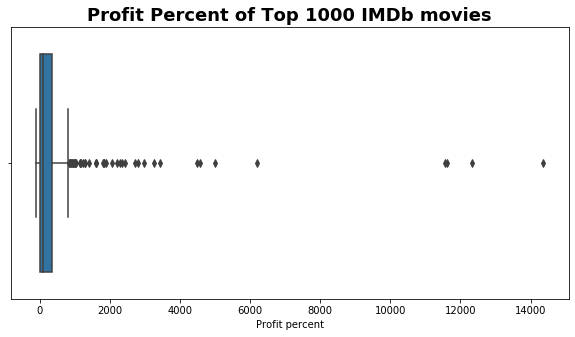

count      474.000000
mean       412.312573
std       1296.203181
min       -100.000000
25%         16.915000
50%        110.437963
75%        340.576923
max      14361.538462
Name: Profit percent, dtype: float64

In [525]:
"""Look at the overall central tendency of Percent Profit """

boxplot(fulldf['Profit percent'],'Profit Percent of Top 1000 IMDb movies')

#### Since the Percent Profit for movies has a lot of outliers it would be better to use the median of 110% as a measure of its central tendecy

### INSIGHT 1:
#### Based on our analysis it seems a budget of about 24 million would be a good starting point .
#### With a movie of this budget we can expect a return of about 110% based on the median return of Top 1000 movies whereas a 324 % return based on our regression model.

### 2. What Genres yields the best returns ?

In [138]:
# split the genre combinations intoa list of genres in the fulldf using comma as the delimiter
fulldf['Movie Genre'] = fulldf['Movie Genre'].str.split(',')

In [139]:
fulldf.head()# Display the Data to make sure its as desired.

,Title,Movie Rating,Year,Director,Gross Income in millions (USD),Movie Genre,Movie Runtime,IMDb Rating,Votes,Budget in millions (USD),Profit percent
0,12 Years a Slave,R,2013,Steve McQueen,56.67,"[Biography, Drama, History]",134,8.1,620427.0,20.0,183.350000
1,127 Hours,R,2010,Danny Boyle,18.34,"[Biography, Drama]",94,7.6,340696.0,18.0,1.888889
2,2001: A Space Odyssey,G,1968,Stanley Kubrick,56.95,"[Adventure, Sci-Fi]",149,8.3,583421.0,10.5,442.380952
3,21 Grams,R,2003,Alejandro G. Iñárritu,16.29,"[Crime, Drama, Thriller]",124,7.7,220537.0,20.0,-18.550000
4,25th Hour,R,2002,Spike Lee,13.06,[Drama],135,7.6,167329.0,4.5,190.222222


In [209]:
"""Explode to create new rows based on genre list while replicating all other column values."""
single_genre_df = fulldf.explode('Movie Genre')

In [210]:
single_genre_df.head()# Display the Data to make sure its as desired.

,Title,Movie Rating,Year,Director,Gross Income in millions (USD),Movie Genre,Movie Runtime,IMDb Rating,Votes,Budget in millions (USD),Profit percent
0,12 Years a Slave,R,2013,Steve McQueen,56.67,Biography,134,8.1,620427.0,20.0,183.350000
0,12 Years a Slave,R,2013,Steve McQueen,56.67,Drama,134,8.1,620427.0,20.0,183.350000
0,12 Years a Slave,R,2013,Steve McQueen,56.67,History,134,8.1,620427.0,20.0,183.350000
1,127 Hours,R,2010,Danny Boyle,18.34,Biography,94,7.6,340696.0,18.0,1.888889
1,127 Hours,R,2010,Danny Boyle,18.34,Drama,94,7.6,340696.0,18.0,1.888889


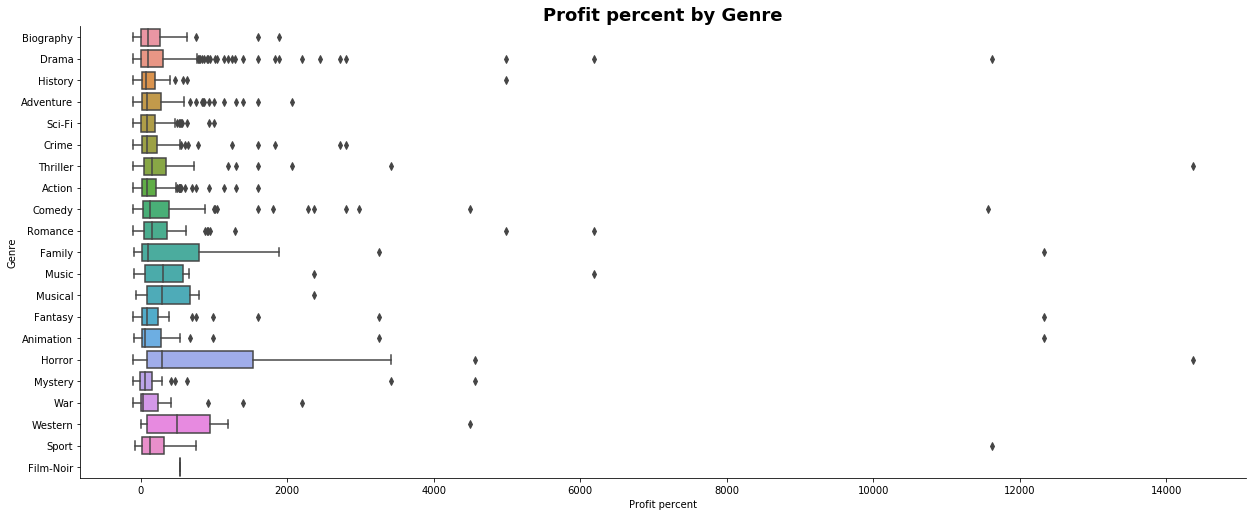

In [108]:
"""Visualize the spread for the profit percent of each genre"""
sns.catplot(y='Movie Genre', x='Profit percent', data=single_genre_df, kind='box', 
            height=7, aspect=2.5)
plt.title('Profit percent by Genre',weight='bold').set_fontsize('18')
plt.ylabel('Genre')
plt.xlabel('Profit percent')
plt.show()

### Looks like the profit percent return on every genre has outliers, so we should consider the median values for a more appropriate measure of its central tendency. Lets look at this again without outliers 

In [110]:
"""Group the data by genre and find median of each group"""
single_genre_median_df = single_genre_df.groupby('Movie Genre').median()

In [111]:
#sort the profit percent  data in descending form 
single_genre_median_df=single_genre_median_df.sort_values('Profit percent',ascending=False).reset_index()


In [482]:
#single_genre_df.head(len(single_genre_df))# Display the Data to make sure its as desired.

#### Lets look at the profit percent return for the movies based on median values for each genre

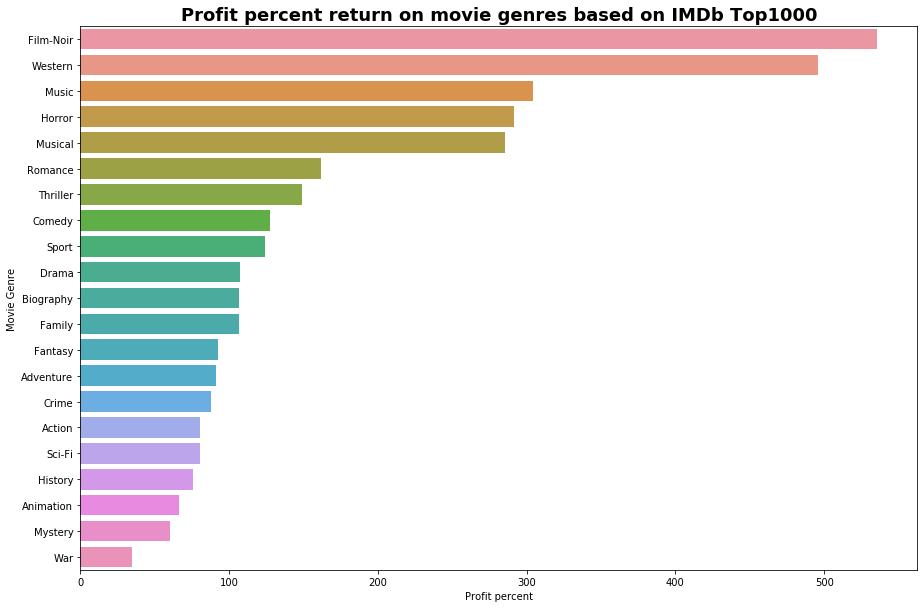

In [112]:
"""Look at the Proft Percent Return For each Genre """
bargraph(single_genre_median_df,single_genre_median_df['Profit percent'],single_genre_median_df['Movie Genre'],"Profit percent return on movie genres based on IMDb Top1000")

### INSIGHT 2:
#### Film-Noir , Western and Music were the most profitable genres .
#### Western and Sport Genres had the least amount of outliers suggesting that movie returns in these genres are less extreme compared to others and perhaps they perform more consistently.



### 3.What Genres were the most popular among the Top 1000 based on IMDb ratings ?

In [160]:
single_genre_df = single_genre_df.groupby('Movie Genre').median()# Group by genre and calculate median values 

In [164]:
single_genre_df = single_genre_df.sort_values('Votes',ascending=False).reset_index()


In [165]:
single_genre_df.head()

,Movie Genre,Year,Gross Income in millions (USD),Movie Runtime,IMDb Rating,Votes,Budget in millions (USD),Profit percent
0,Sci-Fi,2004.0,78.905,119.5,8.0,576585.5,43.50,80.517864
1,Action,2006.0,138.535,122.0,7.8,488594.5,60.00,80.593124
2,Mystery,2004.0,56.000,123.0,7.9,466504.0,35.00,60.012500
3,Adventure,2003.5,178.435,124.5,7.9,456624.0,82.15,91.230273
4,Thriller,2000.0,57.370,117.0,7.8,413892.0,25.00,149.172727


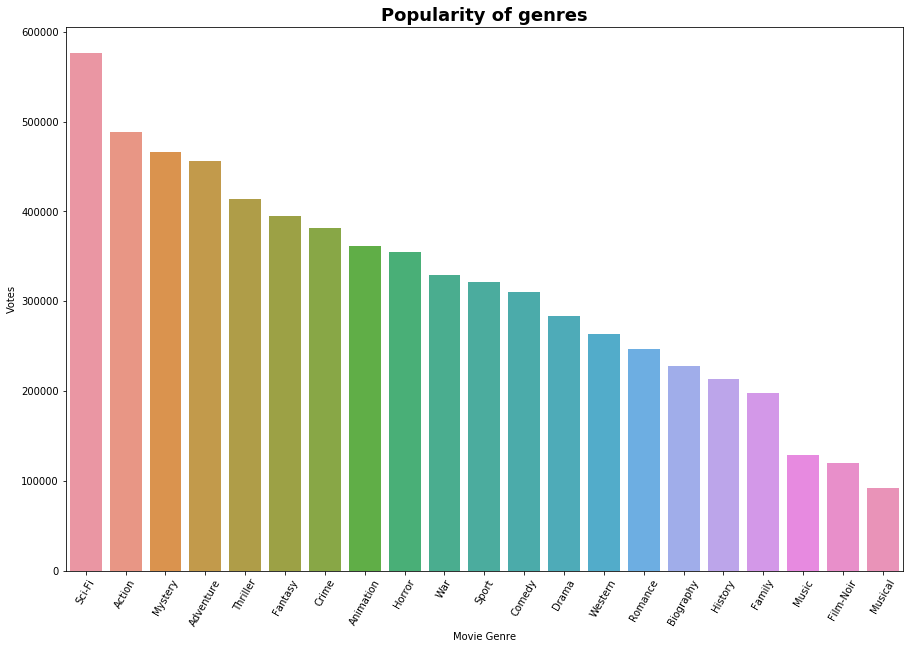

In [166]:
"""Look at the Proft Percent Return For each Genre """
plt.figure(figsize=(15,10))
graph=sns.barplot(y=single_genre_df['Votes'],x=single_genre_df['Movie Genre'])
plt.title("Popularity of genres",weight='bold').set_fontsize('18')
graph.set_xticklabels(graph.get_xticklabels(), rotation=60)
plt.show()

### INSIGHT 3:
#### Overall Sci-Fi is the most popular genre.
#### Although film-noir was the most profitable it isnt the most popular genre.
#### Among the top 10 most popular genres Thriller genre is the most profitable by far followed by Fantasy and War.


genres = list(single_genre_df['Movie Genre'].unique())
single_genre_df = fulldf.explode('Movie Genre')

Genres_profit = {}
for genre in genres:
    Genres_profit[genre] = single_genre_df[single_genre_df['Movie Genre'] == genre]

In [312]:
#print(Genres_profit)

fig, axs = plt.subplots(7, 3, figsize=(15, 24))
axs = axs.ravel()
for i in range(0,len(genres)):
    axs[i].catplot(Genres_profit[genres[i]]['Profit percent'])
    axe.set_title(genres[i])
   

### 3. What runtime is ideal for max profit percent 

In [180]:
#single_genre_df.head()# Display the Data to make sure its as desired.

In [169]:
group_df = fulldf.sort_values('Profit percent',ascending=False).reset_index().head(100)


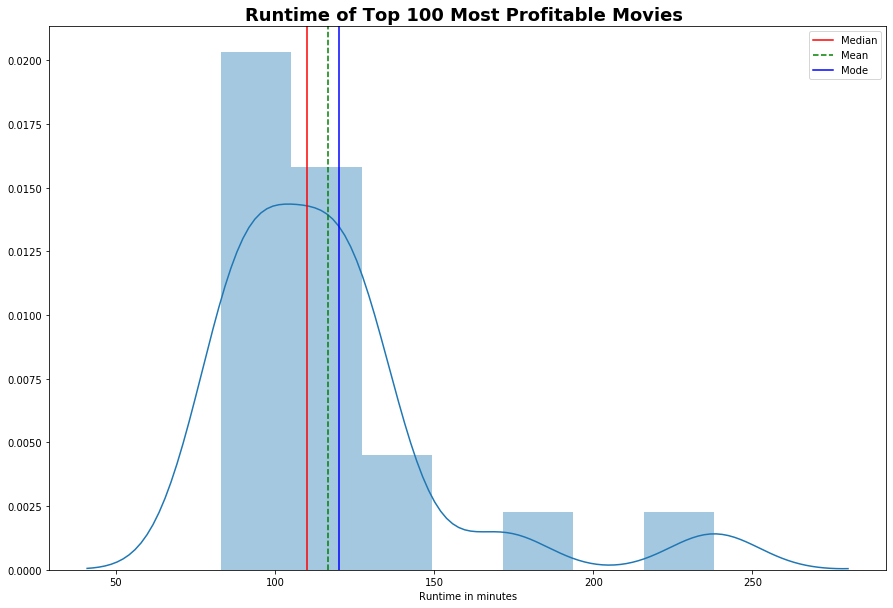

count     20.000000
mean     116.500000
std       35.870381
min       83.000000
25%       91.750000
50%      110.000000
75%      124.250000
max      238.000000
Name: Movie Runtime, dtype: float64

In [203]:
"""Visualize the Runtime data for top 1000 movies """
plt.figure(figsize=(15,10))
graph = sns.distplot(group_df['Movie Runtime'])
graph.axvline(group_df['Movie Runtime'].median().sum(),color='r',linestyle='-')
graph.axvline(group_df['Movie Runtime'].mean().sum(),color='g',linestyle='--')
graph.axvline(group_df['Movie Runtime'].mode().sum(),color='b',linestyle='-')
plt.legend({'Median':group_df['Movie Runtime'].median(),'Mean':group_df['Movie Runtime'].mean(),'Mode':group_df['Movie Runtime'].mode()})
plt.title('Runtime of Top 100 Most Profitable Movies ',weight='bold').set_fontsize('18')
plt.xlabel('Runtime in minutes')
plt.show()
group_df['Movie Runtime'].describe()

#### Looks like this data is positively skewed, so we will use the median as a measure of its central tendency. So The median runtime of top 100 most profitable movies is about 117 minutes.

In [177]:
single_genre_df=single_genre_df.sort_values('Movie Runtime',ascending=False).reset_index()

In [153]:
#single_genre_df.head()

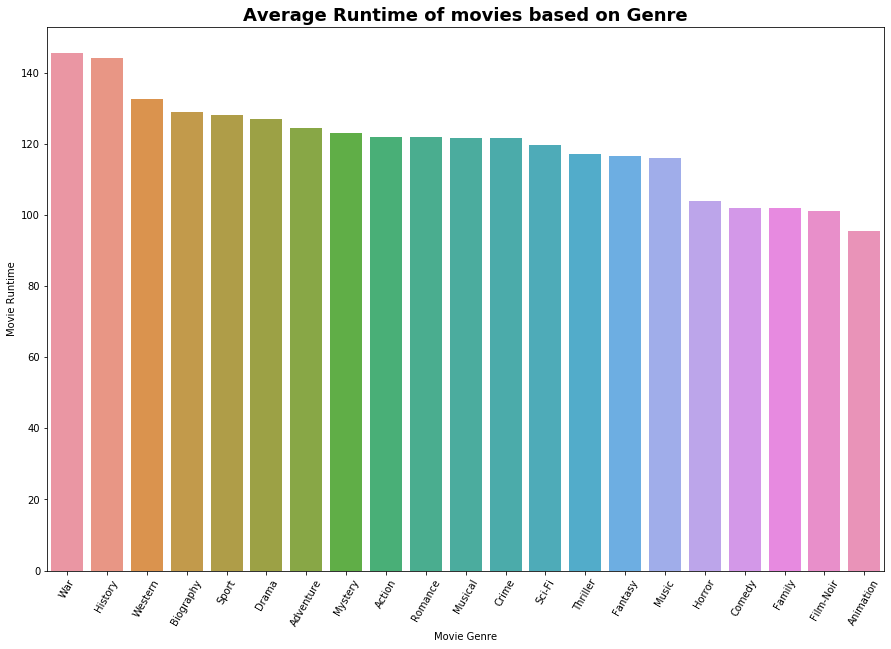

In [179]:
#bargraph(single_genre_df,single_genre_df['Movie Runtime'],single_genre_df['Movie Genre'],"Average Runtime of movies based on Genre")
#plt.text('2', ha='center', va='bottom')
"""Look at the Proft Percent Return For each Genre """
plt.figure(figsize=(15,10))
graph=sns.barplot(y=single_genre_df['Movie Runtime'],x=single_genre_df['Movie Genre'])
plt.title("Average Runtime of movies based on Genre",weight='bold').set_fontsize('18')
graph.set_xticklabels(graph.get_xticklabels(), rotation=60)
plt.show()

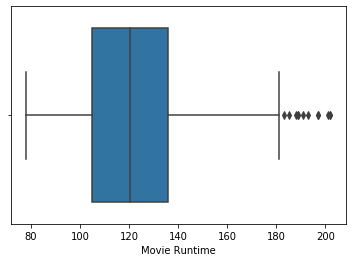

In [196]:
sns.boxplot(testdf['Movie Runtime'])


In [305]:
fulldf['Movie Runtime'].describe()

count    474.000000
mean     125.660338
std       28.658679
min       78.000000
25%      105.000000
50%      121.500000
75%      139.000000
max      242.000000
Name: Movie Runtime, dtype: float64

#### Looking at the data of the Top 20 most profitable movies , a runtime of approx 110 min is ideal. 


In [202]:
group_df = fulldf.sort_values('Profit percent',ascending=False).reset_index().head(20)


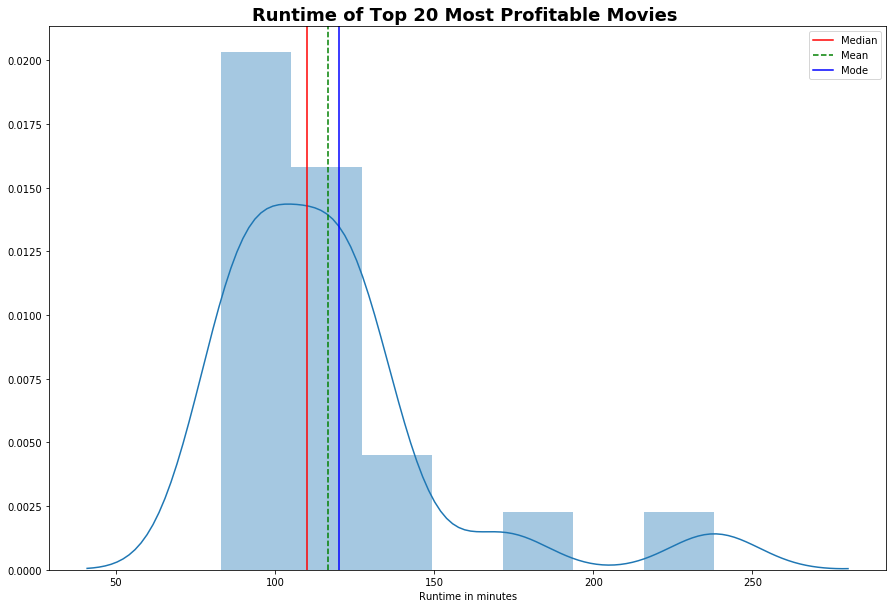

count     20.000000
mean     116.500000
std       35.870381
min       83.000000
25%       91.750000
50%      110.000000
75%      124.250000
max      238.000000
Name: Movie Runtime, dtype: float64

In [242]:
"""Visualize the Runtime data of the top 20 most profitable movies  """
plt.figure(figsize=(15,10))
graph = sns.distplot(group_df['Movie Runtime'])
graph.axvline(group_df['Movie Runtime'].median().sum(),color='r',linestyle='-')
graph.axvline(group_df['Movie Runtime'].mean().sum(),color='g',linestyle='--')
graph.axvline(group_df['Movie Runtime'].mode().sum(),color='b',linestyle='-')
plt.legend({'Median':group_df['Movie Runtime'].median(),'Mean':group_df['Movie Runtime'].mean(),'Mode':group_df['Movie Runtime'].mode()})
plt.title('Runtime of Top 20 Most Profitable Movies ',weight='bold').set_fontsize('18')
plt.xlabel('Runtime in minutes')
plt.show()
group_df['Movie Runtime'].describe()

#### Looking at the data of the Top 20 most profitable movies , a runtime of approx 110 min is ideal. Looks like the run time is decreasing as percent profit is increasing. We can do a best fit line to confirm this trend as seen below
.

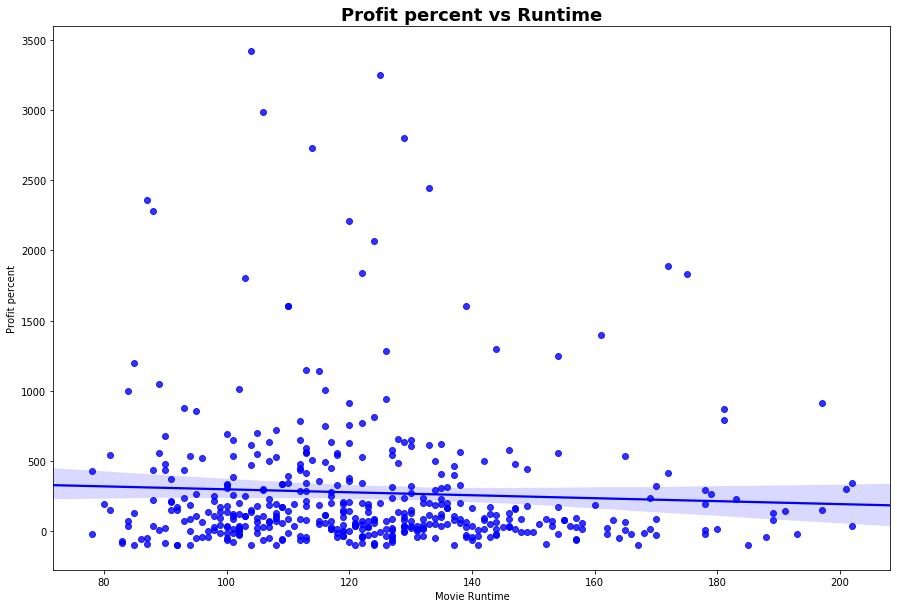

In [215]:
plt.figure(figsize=(15,10))
sns.regplot(x=testdf['Movie Runtime'], y=testdf['Profit percent'],data=testdf,color='blue')
plt.title('Profit percent vs Runtime',weight='bold').set_fontsize('18')

In [217]:
single_genre_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1218 entries, 0 to 473
Data columns (total 11 columns):
Title                             1218 non-null object
Movie Rating                      1218 non-null object
Year                              1218 non-null int64
Director                          1218 non-null object
Gross Income in millions (USD)    1218 non-null float64
Movie Genre                       1218 non-null object
Movie Runtime                     1218 non-null int64
IMDb Rating                       1218 non-null float64
Votes                             1218 non-null float64
Budget in millions (USD)          1218 non-null float64
Profit percent                    1218 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 154.2+ KB


In [226]:
"""Unique Genre list"""
genres = list (single_genre_df['Movie Genre'].unique())
genres

['Biography',
 'Drama',
 'History',
 'Adventure',
 'Sci-Fi',
 'Crime',
 'Thriller',
 'Action',
 'Comedy',
 'Romance',
 'Family',
 'Music',
 'Musical',
 'Fantasy',
 'Animation',
 'Horror',
 'Mystery',
 'War',
 'Western',
 'Sport',
 'Film-Noir']

In [241]:
"""Create a dictionary of unique Genre data frames"""
genres_df = {}
for genre in genres:
    genres_df[genre] = single_genre_df[single_genre_df['Movie Genre'] == genre]
    #if len(genres_df[genre])> 50:
    print(genre,len(genres_df[genre]))


Biography 65
Drama 314
History 27
Adventure 128
Sci-Fi 58
Crime 82
Thriller 69
Action 104
Comedy 103
Romance 47
Family 29
Music 12
Musical 6
Fantasy 36
Animation 40
Horror 14
Mystery 43
War 18
Western 8
Sport 14
Film-Noir 1


In [228]:
len(director_genres['Film-Noir'])

1

In [257]:
director_df = single_genre_df.groupby('Director').count()

In [261]:
director_df=director_df.sort_values('Title',ascending=False).reset_index().head(20)

In [262]:
director_df.head(25)

,index,Director,Title,Movie Rating,Year,Gross Income in millions (USD),Movie Genre,Movie Runtime,IMDb Rating,Votes,Budget in millions (USD),Profit percent
0,0,Steven Spielberg,22,22,22,22,22,22,22,22,22,22
1,2,Christopher Nolan,21,21,21,21,21,21,21,21,21,21
2,3,Martin Scorsese,21,21,21,21,21,21,21,21,21,21
3,1,David Fincher,21,21,21,21,21,21,21,21,21,21
4,4,Ridley Scott,17,17,17,17,17,17,17,17,17,17
5,5,Clint Eastwood,16,16,16,16,16,16,16,16,16,16
6,6,Denis Villeneuve,15,15,15,15,15,15,15,15,15,15
7,7,Wes Anderson,14,14,14,14,14,14,14,14,14,14
8,8,Peter Jackson,14,14,14,14,14,14,14,14,14,14
9,9,Ron Howard,14,14,14,14,14,14,14,14,14,14


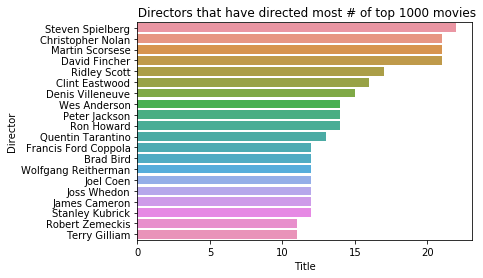

In [263]:

plt.title(" Directors that have directed most # of top 1000 movies")
plt13=sns.barplot(y=director_df.Director,x=director_df.Title)
